## Generate data

In [1]:
import numpy as np
from random import uniform

power_noize = 0.1

X = np.linspace(0, 10, 1000)
X_noize = np.array([i+uniform(0, power_noize) for i in X])
A = 2.794
B = 1.45
y = np.array([i*A+B for i in X])

In [2]:
print(X[::50], X_noize[::50], sep='\n')

[0.         0.5005005  1.001001   1.5015015  2.002002   2.5025025
 3.003003   3.5035035  4.004004   4.5045045  5.00500501 5.50550551
 6.00600601 6.50650651 7.00700701 7.50750751 8.00800801 8.50850851
 9.00900901 9.50950951]
[0.0635804  0.53248502 1.04086302 1.51265444 2.09620716 2.55792224
 3.06377245 3.50363125 4.08037481 4.51573499 5.0939717  5.55326942
 6.04276035 6.54342985 7.05447111 7.55602526 8.07427621 8.52311195
 9.06765743 9.59821724]


In [3]:
feature_dim = X_noize.ndim
object_count = X_noize.shape[0]

## Construct model

In [4]:
from torch import nn

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=1, out_features=1, bias=True)
        )
    
    def forward(self, x):
        x = self.linear_stack(x)
        return self.linear_stack(x)


In [5]:
from torch import device, cuda

device = device('cuda' if cuda.is_available() else 'cpu')
print(device)

cpu


In [6]:
model = MyModel().to(device)
print(model)

MyModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)


In [7]:
X_noize = X_noize.astype(np.float32)
y = y.astype(np.float32)

In [8]:
from torch import from_numpy
from sklearn.model_selection import train_test_split

X_noize = from_numpy(X_noize).unsqueeze(1)
y = from_numpy(y).unsqueeze(1)

train_X, test_X, train_y, test_y = train_test_split(X_noize, y, test_size=0.3, random_state=42)

In [9]:
print(train_X[::100])

tensor([[5.4816],
        [0.2594],
        [6.8819],
        [0.2496],
        [7.9815],
        [5.6243],
        [8.2491]])


In [10]:
print(X_noize[::50], X_noize[::50], sep='\n')
print(X_noize.dtype, X_noize.dtype)
print(X_noize.shape, X_noize.shape)
print(X_noize.ndim, X_noize.ndim)

tensor([[0.0636],
        [0.5325],
        [1.0409],
        [1.5127],
        [2.0962],
        [2.5579],
        [3.0638],
        [3.5036],
        [4.0804],
        [4.5157],
        [5.0940],
        [5.5533],
        [6.0428],
        [6.5434],
        [7.0545],
        [7.5560],
        [8.0743],
        [8.5231],
        [9.0677],
        [9.5982]])
tensor([[0.0636],
        [0.5325],
        [1.0409],
        [1.5127],
        [2.0962],
        [2.5579],
        [3.0638],
        [3.5036],
        [4.0804],
        [4.5157],
        [5.0940],
        [5.5533],
        [6.0428],
        [6.5434],
        [7.0545],
        [7.5560],
        [8.0743],
        [8.5231],
        [9.0677],
        [9.5982]])
torch.float32 torch.float32
torch.Size([1000, 1]) torch.Size([1000, 1])
2 2


In [11]:
print(train_X[::50], train_y[::50], sep='\n')
print(train_X.dtype, train_y.dtype)
print(train_X.shape, train_y.shape)
print(train_X.ndim, train_y.ndim)

tensor([[5.4816],
        [1.8253],
        [0.2594],
        [5.9348],
        [6.8819],
        [1.2201],
        [0.2496],
        [1.9774],
        [7.9815],
        [6.3188],
        [5.6243],
        [0.3525],
        [8.2491],
        [8.7618]])
tensor([[16.5807],
        [ 6.5122],
        [ 2.1212],
        [17.8113],
        [20.4682],
        [ 4.6943],
        [ 1.9255],
        [ 6.8758],
        [23.4888],
        [18.9020],
        [17.0002],
        [ 2.3450],
        [24.2439],
        [25.9220]])
torch.float32 torch.float32
torch.Size([700, 1]) torch.Size([700, 1])
2 2


In [12]:
from torch.optim import SGD
from torch import no_grad

loss_func = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.0001)

def train(x_for_train, y_for_train, model_for_train, epochs, loss_fn, optim):
    for epoch in range(epochs):
        pred = model_for_train(x_for_train)
        loss = loss_fn(pred, y_for_train)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")
        loss.backward()
        optim.step()
        optim.zero_grad()

def test(x_for_test, y_for_test, model_for_test):
    model.eval()
    
    with no_grad():
        pred = model_for_test(x_for_test)
        test_loss = loss_func(pred, y_for_test)
        print(test_loss)

In [13]:
train(train_X, train_y, model, epochs=200, loss_fn=loss_func, optim=optimizer)

Epoch 1/200, Loss: 207.7445068359375
Epoch 2/200, Loss: 202.03955078125
Epoch 3/200, Loss: 196.11961364746094
Epoch 4/200, Loss: 189.99366760253906
Epoch 5/200, Loss: 183.6730194091797
Epoch 6/200, Loss: 177.1716766357422
Epoch 7/200, Loss: 170.50611877441406
Epoch 8/200, Loss: 163.69549560546875
Epoch 9/200, Loss: 156.76136779785156
Epoch 10/200, Loss: 149.7277069091797
Epoch 11/200, Loss: 142.62066650390625
Epoch 12/200, Loss: 135.46835327148438
Epoch 13/200, Loss: 128.30035400390625
Epoch 14/200, Loss: 121.14752197265625
Epoch 15/200, Loss: 114.04132843017578
Epoch 16/200, Loss: 107.01360321044922
Epoch 17/200, Loss: 100.09571075439453
Epoch 18/200, Loss: 93.31829071044922
Epoch 19/200, Loss: 86.71054077148438
Epoch 20/200, Loss: 80.29975128173828
Epoch 21/200, Loss: 74.11082458496094
Epoch 22/200, Loss: 68.16592407226562
Epoch 23/200, Loss: 62.484046936035156
Epoch 24/200, Loss: 57.08076858520508
Epoch 25/200, Loss: 51.96819305419922
Epoch 26/200, Loss: 47.154693603515625
Epoch 27/

In [14]:
test(test_X, test_y, model)

tensor(0.0535)


## Show

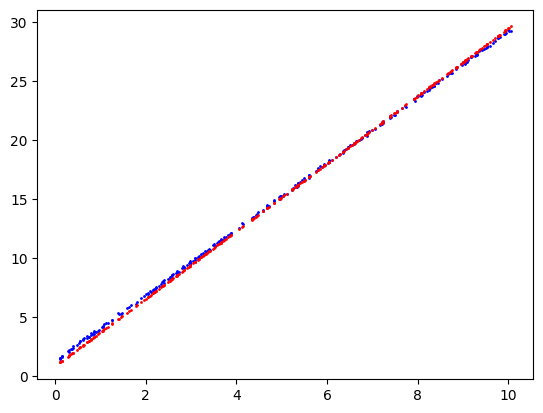

In [15]:
from matplotlib import pyplot as plt

with no_grad():
    pred = model(test_X)

plt.scatter(test_X, test_y, s=1, c='b')
plt.scatter(test_X, pred, s=1, c='r')
plt.show()